In [2]:
from scipy.linalg import circulant
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import cvxpy as cvx

In [10]:
source_path = 'Data01.mat'
mat = scipy.io.loadmat(source_path)

In [13]:
t = mat['t']
y = mat['y']
N = y.shape[0]

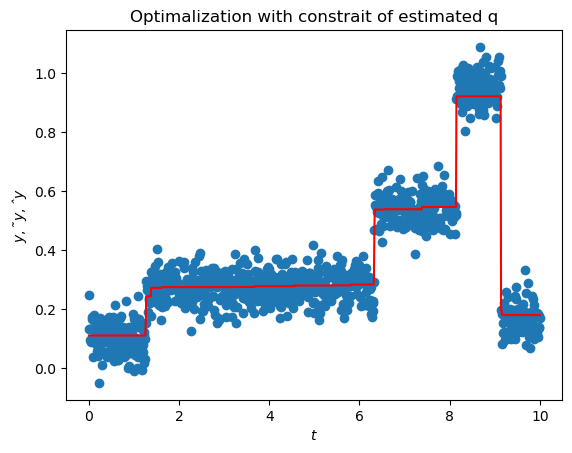

In [98]:

y_pred = cvx.Variable((N,1))
q = 1.55
c1 = cvx.norm1(y_pred[1:] - y_pred[0:-1]) <= q

diff = cvx.Minimize(cvx.power(cvx.norm2(y_pred - y), 2))
problem = cvx.Problem(diff, [c1])
problem.solve(solver="ECOS")
plt.plot(t, y_pred.value, c='r')
plt.title("Optimalization with constrait of estimated q")
plt.xlabel("$t$")
plt.ylabel("$y,˜y, ˆy$")
plt.scatter(t, y)
plt.show()

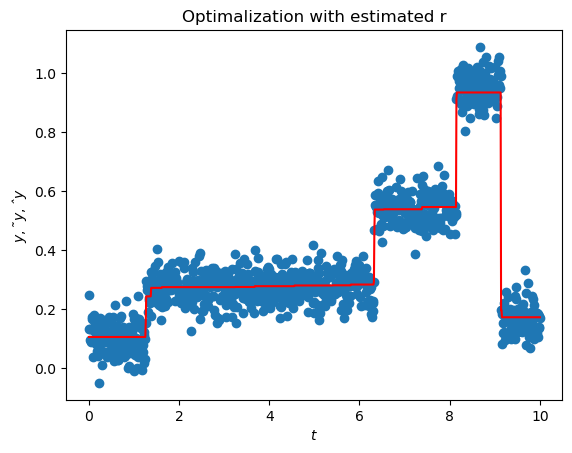

In [97]:
y_pred = cvx.Variable((N,1))
r = 1.55

diff = cvx.Minimize(cvx.power(cvx.norm2(y_pred - y), 2) + cvx.norm1(y_pred[1:] - y_pred[0:-1]) * r)
problem = cvx.Problem(diff, [])
problem.solve(solver="ECOS")
plt.plot(t, y_pred.value, c='r')
plt.title("Optimalization with estimated r")
plt.xlabel("$t$")
plt.ylabel("$y,˜y, ˆy$")
plt.scatter(t, y)
plt.show()

In [137]:
N = 4

first_row = np.zeros(N)
first_row[0] = -1
first_row[1] = 1
D = circulant(first_row).transpose()[:-1]

A = np.block([
    [np.identity(N), -np.identity(N), np.zeros((N, (N-1)))],
     [-np.identity(N), -np.identity(N), np.zeros((N, (N-1)))],
     [np.zeros((1, N)), np.zeros((1, N)), np.ones((N-1))],
     [-D, np.zeros(((N-1), N)), -np.identity((N-1))],
     [D, np.zeros(((N-1), N)), -np.identity((N-1))]
])

c = np.block([
    [np.zeros((N, 1))],
    [np.ones((N, 1))],
    [np.zeros((N-1, 1))]
])

In [134]:
A

array([[ 1.,  0.,  0.,  0., -1., -0., -0., -0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0., -0., -1., -0., -0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0., -0., -0., -1., -0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -0., -0., -0., -1.,  0.,  0.,  0.],
       [-1., -0., -0., -0., -1., -0., -0., -0.,  0.,  0.,  0.],
       [-0., -1., -0., -0., -0., -1., -0., -0.,  0.,  0.,  0.],
       [-0., -0., -1., -0., -0., -0., -1., -0.,  0.,  0.,  0.],
       [-0., -0., -0., -1., -0., -0., -0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 1., -1., -0., -0.,  0.,  0.,  0.,  0., -1., -0., -0.],
       [-0.,  1., -1., -0.,  0.,  0.,  0.,  0., -0., -1., -0.],
       [-0., -0.,  1., -1.,  0.,  0.,  0.,  0., -0., -0., -1.],
       [-1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -1., -0., -0.],
       [ 0., -1.,  1.,  0.,  0.,  0.,  0.,  0., -0., -1., -0.],
       [ 0.,  0., -1.,  1.,  0.,  0.,  0.,  0., -0., -0., -1.]])

In [122]:
first_row = np.zeros(N)
first_row[0] = -1
first_row[1] = 1

In [123]:
first_row

array([-1.,  1.,  0.,  0.,  0.])

In [124]:
circulant(first_row).transpose()[:-1]

array([[-1.,  1.,  0.,  0.,  0.],
       [ 0., -1.,  1.,  0.,  0.],
       [ 0.,  0., -1.,  1.,  0.],
       [ 0.,  0.,  0., -1.,  1.]])